## Lire et explorer les pages web: HTML — XML

Documentation et tutoriels

* https://www.w3schools.com/html/html_intro.asp
* https://www.w3schools.com/xml/default.asp
* https://www.w3schools.com/xml/xpath_intro.asp


Application (avec des librairies différentes):

* https://programminghistorian.org/fr/lecons/comprendre-les-pages-web
* https://programminghistorian.org/fr/lecons/telecharger-des-pages-web-avec-python

In [1]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import lxml.html

In [16]:
html = requests.get('https://fr.wikipedia.org/wiki/Johannes_Kepler')
doc = lxml.html.fromstring(html.content)

In [17]:
paragraphes = [p for p in doc.xpath('//p')]
paragraphes[:3], len(paragraphes)

([<Element p at 0x7f12347a5a40>,
  <Element p at 0x7f123214be00>,
  <Element p at 0x7f1232005a90>],
 59)

In [18]:
for p in paragraphes [:10]:
    for e in p.xpath('child.'):
        print(e.xpath('text()'))
    

In [19]:
wikitext = []
for p in paragraphes: # [:10]:
    wikitext += p.text_content().split()

In [20]:
wikitext[280:300]

['étant',
 'ainsi',
 'rarement',
 'présent',
 'à',
 'son',
 'domicile.',
 'La',
 'mère,',
 'Katharina',
 'Guldenmann,',
 'analphabète,',
 'dure',
 'et',
 'tracassière',
 '—',
 'que',
 'Kepler',
 'qualifie',
 'lui-même']

In [79]:
stopw = """alors
ainsi
au
aucuns
aussi
autre
avant
avec
avoir
bon
car
ce
cela
ces
cette
ceux
chaque
ci
comme
comment
dans
des
du
dedans
dehors
depuis
devrait
doit
donc
dos
début
elle
elles
en
encore
entre
essai
est
et
était
eu
fait
faites
fois
font
hors
ici
il
ils
je
juste
la
le
les
leur
là
ma
maintenant
mais
mes
mien
moins
mon
mot
même
ni
nommés
notre
nous
ou
où
par
parce
pas
peut
peu
plupart
pour
pourquoi
quand
que
quel
quelle
quelles
quels
qui
sa
sans
ses
seulement
si
sien
son
sont
sous
soyez
sujet
sur
ta
tandis
tellement
tels
tes
ton
tous
tout
trop
très
tu
voient
vont
votre
vous
vu
ça
étaient
état
étions
été
être"""

In [80]:
stopw_l = stopw.split('\n')
stopw_l[:3]

['alors', 'ainsi', 'au']

In [81]:
wt = ' '.join([t for t in wikitext if (len(t.strip())) > 4 and t not in stopw_l ])
wt[:100]

'Pages contributeurs déconnectés savoir Kepler redirige autres significations, Kepler (homonymie). mo'

In [82]:
wt[:1000]

"Pages contributeurs déconnectés savoir Kepler redirige autres significations, Kepler (homonymie). modifier Johannes Kepler[n Keppler), décembre (ville libre d'Empire) novembre Ratisbonne (ville libre d'Empire), astronome allemand célèbre étudié l’hypothèse héliocentrique Nicolas Copernic, affirmant Terre tourne autour Soleil surtout découvert planètes tournent autour Soleil suivant trajectoires circulaires parfaites trajectoires elliptiques. Kepler découvert relations mathématiques (dites Kepler) régissent mouvements planètes orbite. relations furent ensuite exploitées Isaac Newton élaborer théorie gravitation universelle. »[1]. Kepler d’une famille religion protestante luthérienne, installée ville Wurtemberg[2], ville libre l'autorité immédiate l'Empire[n Stadt, Kepler d'une certaine reconnaissance sociale, grand-père bourgmestre, après porté combattu ordres Charles-Quint, sombré pauvreté. Toute famille s'entasse maison grands-parents, Sebald Kepler Katharina Müller[3]. prématurément

In [83]:
### Particularité : 'Kepler'
stopw_suppl=('Kepler', 'l','n', 'd','une','qu','il')

In [84]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopw_suppl).generate(wt)

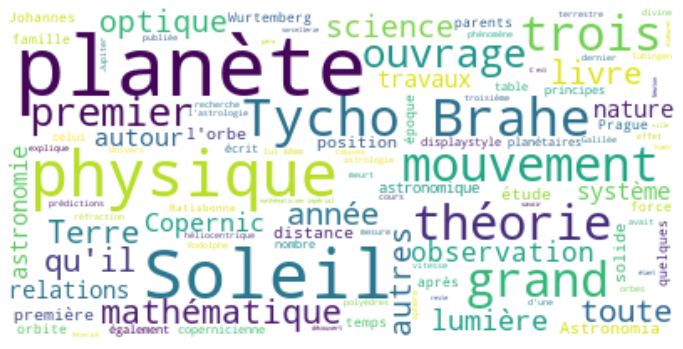

In [85]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
freq_words = WordCloud( stopwords=stopw_suppl).process_text(wt)

In [87]:
fw_list = sorted(freq_words.items(), key=lambda x:x[1], reverse=True)
sort_fwl = dict(fw_list)
print(sort_fwl)

{'planète': 22, 'Soleil': 14, 'physique': 12, 'Tycho Brahe': 10, 'théorie': 9, 'grand': 9, 'trois': 9, 'mouvement': 9, 'premier': 9, 'ouvrage': 9, 'mathématique': 9, 'Terre': 8, 'toute': 8, "qu'il": 8, 'année': 8, 'livre': 8, 'autres': 7, 'optique': 7, 'science': 7, 'lumière': 7, 'observation': 7, 'Copernic': 6, 'autour': 6, 'relations': 6, 'nature': 6, 'astronomie': 6, 'travaux': 6, 'système': 6, 'première': 6, 'Astronomia': 6, 'position': 6, 'distance': 6, 'solide': 6, "l'orbe": 6, 'étude': 6, 'astronomique': 6, 'Johannes': 5, 'orbite': 5, 'famille': 5, 'Wurtemberg': 5, 'après': 5, 'parents': 5, 'force': 5, 'temps': 5, 'quelques': 5, 'époque': 5, 'Prague': 5, 'planétaires': 5, 'écrit': 5, 'principes': 5, 'copernicienne': 5, 'nombre': 5, 'également': 5, 'celui': 5, 'displaystyle': 5, 'table': 5, 'Ratisbonne': 4, 'héliocentrique': 4, "d'une": 4, 'avait': 4, 'recherche': 4, 'cours': 4, 'phénomène': 4, 'Tübingen': 4, 'prédictions': 4, 'meurt': 4, 'Rodolphe': 4, 'mesure': 4, 'troisième': 